In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('fev.txt', usecols=['AGE', 'FEV', 'HEIGHT','SEX', 'SMOKE'])
df.head()

,AGE,FEV,HEIGHT,SEX,SMOKE
0,9,1.708,57.0,2,2
1,8,1.724,67.5,2,2
2,7,1.720,54.5,2,2
3,9,1.558,53.0,1,2
4,9,1.895,57.0,1,2


In [3]:
df['SMOKE'] = df['SMOKE'].replace({2:0})
df['SEX'] = df['SEX'].replace({2:0})
df.head()

,AGE,FEV,HEIGHT,SEX,SMOKE
0,9,1.708,57.0,0,0
1,8,1.724,67.5,0,0
2,7,1.720,54.5,0,0
3,9,1.558,53.0,1,0
4,9,1.895,57.0,1,0


Smokers = 1
Nonsmokers = 0 (as reference)
Male = 1
Female = 0 (as reference)

### Model ( FEV and SMOKE )

In [4]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = df['SMOKE']
y = df['FEV']
X_constant = sm.add_constant(X)
lin_reg_smoke_fev = sm.OLS(y,X_constant).fit()
lin_reg_smoke_fev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     41.79
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.99e-10
Time:                        10:23:08   Log-Likelihood:                -813.88
No. Observations:                 654   AIC:                             1632.
Df Residuals:                     652   BIC:                             1641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5661      0.035     74.037      0.000       2.498       2.634
SMOKE          0.7107      0.110      6.464      0.000       0.495       0.927
==============================================================================
Omnibus:                       55.456   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.952
Skew:                           0.736   Prob(JB):                     1.76e-15
Kurtosis:                       3.570   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

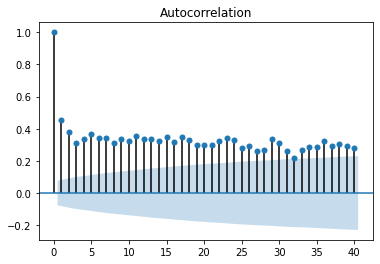

In [5]:

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg_smoke_fev.resid, lags=40 , alpha=0.05)


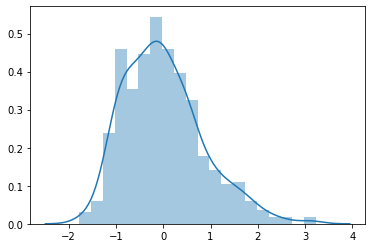

In [6]:
sns.distplot(lin_reg_smoke_fev.resid)

We have fit the model for SMOKE and FEV. The regression equation is fev = 2.57 + 0.711 smoke. Taken at face value, this model indicates that, on average, smokers have about a 0.71 liter larger FEV than nonsmokers. R2 value is 0.06. 

To check if Age confounds the association between Smoking and FEV we can add age to our model. We will compare our simple linear regression model (SMOKE and FEV) with our multiple variable linear model which includes age (SMOKE, AGE and FEV)

### Model ( FEV = AGE + SMOKE )

In [7]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = df[['AGE', 'SMOKE']]
y = df['FEV']
X_constant = sm.add_constant(X)
lin_reg_sa = sm.OLS(y,X_constant).fit()
lin_reg_sa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     443.3
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          3.25e-122
Time:                        10:23:09   Log-Likelihood:                -553.17
No. Observations:                 654   AIC:                             1112.
Df Residuals:                     651   BIC:                             1126.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3674      0.081      4.511      0.000       0.207       0.527
AGE            0.2306      0.008     28.176      0.000       0.215       0.247
SMOKE         -0.2090      0.081     -2.588      0.010      -0.368      -0.050
==============================================================================
Omnibus:                       37.843   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.741
Skew:                           0.490   Prob(JB):                     5.82e-12
Kurtosis:                       3.969   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimate for the smoke changes from 0.7107 to -0.2090(which is more than 10%), the direction of the association changes from positive to negative, which is a substancial change. SO AGE appears to be a confounder between smoking and fev and should be kept in our model.
So we can interprete it as smokers has an fev less 0.21 liters lower than non smokers adjusting for age.

Now as next step lets add gender.

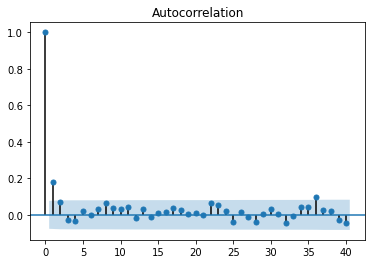

In [8]:
acf = smt.graphics.plot_acf(lin_reg_sa.resid, lags=40 , alpha=0.05)

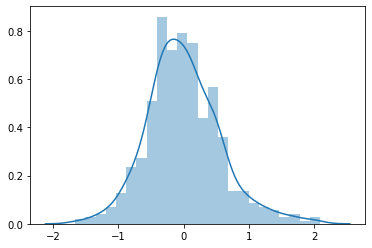

In [9]:
sns.distplot(lin_reg_sa.resid)

### Model ( FEV = AGE + SEX + SMOKE )

In [29]:
X = df[['AGE', 'SMOKE', 'SEX']]
y = df['FEV']
X_constant = sm.add_constant(X)
lin_reg_sas = sm.OLS(y,X_constant).fit()
print(lin_reg_sas.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     337.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          3.45e-132
Time:                        10:59:31   Log-Likelihood:                -526.84
No. Observations:                 654   AIC:                             1062.
Df Residuals:                     650   BIC:                             1080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2378      0.080      2.964      0.0

Change in coeff on smoke is around 29%. So sex is a confounder theoretically and statistically. For checking effect modifications we will stratify the model by sex. We will group the data into male and female group and perform our statistical analysis.

In [11]:
g=df.groupby('SEX')
df_male = g.get_group(1)
df_female = g.get_group(0)

### Model sex=1 Model ( FEV = SMOKE + AGE )

In [12]:
X = df_male[['SMOKE', 'AGE']]
y = df_male['FEV']
X_constant = sm.add_constant(X)
lin_reg_sa = sm.OLS(y,X_constant)
a=lin_reg_sa.fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     322.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           1.25e-78
Time:                        10:23:10   Log-Likelihood:                -296.48
No. Observations:                 336   AIC:                             599.0
Df Residuals:                     333   BIC:                             610.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0271      0.118      0.230      0.8

Male smokers have FEV -0.1750 liters less than the non smokers.

### Model sex=0 Model ( FEV = SMOKE + AGE )

In [13]:
X = df_female[['AGE', 'SMOKE']]
y = df_female['FEV']
X_constant = sm.add_constant(X)
lin_reg_sa = sm.OLS(y,X_constant).fit()
print(lin_reg_sa.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           7.25e-55
Time:                        10:23:10   Log-Likelihood:                -185.79
No. Observations:                 318   AIC:                             377.6
Df Residuals:                     315   BIC:                             388.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8290      0.091      9.135      0.0

Female smokers have FEV -0.05 liters less than the non smokers.

Now we will try tro fit a model with interaction term. 

In [ ]:
age smoke sex sex*smoke

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X = df[['AGE', 'SMOKE']]
y = df['FEV']
X_constant = sm.add_constant(X)
lin_reg_sa = sm.OLS(y,X_constant).fit()
lin_reg_sa.summary()

In [30]:
df['SEX*SMOKE']=df['SEX']*df['SMOKE']
df

,AGE,FEV,HEIGHT,SEX,SMOKE,SEX*SMOKE
0,9,1.708,57.0,0,0,0
1,8,1.724,67.5,0,0,0
2,7,1.720,54.5,0,0,0
3,9,1.558,53.0,1,0,0
4,9,1.895,57.0,1,0,0
...,...,...,...,...,...,...
649,16,4.270,67.0,1,1,1
650,15,3.727,68.0,1,1,1
651,18,2.853,60.0,0,0,0
652,16,2.795,63.0,0,1,0


In [35]:
X = df[['AGE', 'SMOKE', 'SEX', 'SEX*SMOKE']]
y = df['FEV']
X_constant = sm.add_constant(X)
lin_reg_sam = sm.OLS(y,X_constant).fit()
print(lin_reg_sam.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          4.07e-132
Time:                        13:35:16   Log-Likelihood:                -523.99
No. Observations:                 654   AIC:                             1058.
Df Residuals:                     649   BIC:                             1080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2585      0.080      3.214      0.0

Females
fev = age*0.25 + smoke(-0.3) + sex*0.3 + sex*smoke(0.34) + 0.25
fev = 0.25*age -0.3*smoke + 0.25

Males
fev = age*0.25 + smoke(-0.3) + sex*0.3 + sex*smoke(0.34) +0.25
fev = 0.25*age - 0.3*smoke + 0.3 + 0.34*smoke +0.25
fev = 0.25*age + 0.04smoke + 0.3 +0.25
fev = 0.25*age + 0.55





it clearly suggests that the rate of change of fev in male is different than in females. The decrease in fev in males is much greated than in females.


In [43]:
X_constant.values

array([[ 1.,  9.,  0.,  0.,  0.],
       [ 1.,  8.,  0.,  0.,  0.],
       [ 1.,  7.,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0.,  0.,  0.],
       [ 1., 16.,  1.,  0.,  0.],
       [ 1., 15.,  0.,  0.,  0.]])

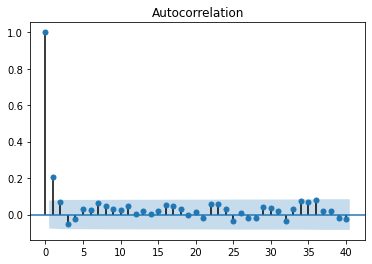

In [66]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg_sam.resid, lags=40 , alpha=0.05)
acf.show()

In [45]:
X.values

array([[ 9,  0,  0,  0],
       [ 8,  0,  0,  0],
       [ 7,  0,  0,  0],
       ...,
       [18,  0,  0,  0],
       [16,  1,  0,  0],
       [15,  0,  0,  0]], dtype=int64)

In [46]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [48]:
reg.coef_

array([ 0.22644148, -0.29430553,  0.28236702,  0.34395404])

In [60]:
residuals=lin_reg_sam.resid

In [57]:
lin_reg_sam.predict

<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x164333B8>>

In [59]:
print(reg.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [ ]:
sns.scatterplot(x='HEIGHT', y='FEV', data=df)

In [61]:
residuals

0     -0.588426
1     -0.345985
2     -0.123543
3     -1.020793
4     -0.683793
         ...   
649    0.056468
650   -0.260091
651   -1.481400
652   -0.792211
653   -0.444075
Length: 654, dtype: float64

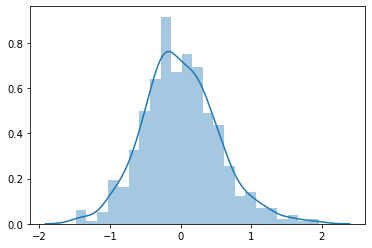

In [62]:
sns.distplot(residuals)

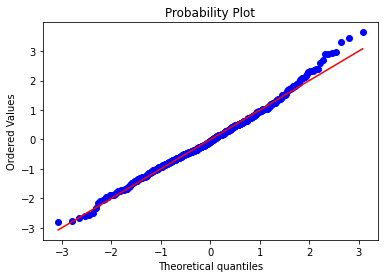

In [63]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot

st_residual = lin_reg_sam.get_influence().resid_studentized_internal

stats.probplot(st_residual, dist="norm", plot = pylab)

plt.show()

In [65]:
residuals.mean()

-1.062011504901373e-14

In [1]:
from sklearn.model_selection import train_test_split